<a href="https://colab.research.google.com/github/mubinui/ASSEMBLYCODES8086/blob/main/TextDetection01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3><b>Neural network</b> in depth</h3>
We will use sigmoid function here on the first example. It converts any value in the range of 0 to 1.<br>
$$z= \frac 1{1+e^{-y}} $$
Here <b>Y</b> is the summation of weights and bias 
$$y=\sum_{i=0}^n w_ix_i+b$$ <br>
<big>We will work with <b>tensorflow</b> here</big>





In [98]:
from tensorflow.python.eager.context import internal_operation_seed
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 

Importing digit recognizing dataset from keras 

In [99]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [100]:
print(len(X_train))
print(len(X_test))
print(X_train[0].shape) # should be a 28 by 28 image 
print(X_test[0].shape)

60000
10000
(28, 28)
(28, 28)


In [101]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

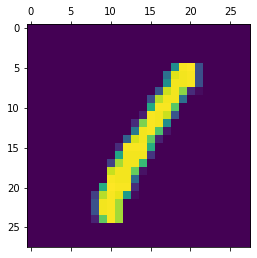

In [102]:
plt.matshow(X_train[3])

Lets Scale the data for increasing the accuracy

In [103]:
X_train = X_train / 255
X_test = X_test / 255

In [104]:
print(y_train[:9]) # has the features for predicting x 

[5 0 4 1 9 2 1 3 1]


In [105]:
X_train_flatten = X_train.reshape(len(X_train), 28*28 ) # here we are flattening the matrix (X_train)
X_test_flatten = X_test.reshape(len(X_test), 28*28)

In [106]:
print(X_train_flatten.shape)
print(X_test_flatten.shape)

(60000, 784)
(10000, 784)


In [107]:
# We have successfully converted two dimensional array to single dimension array
X_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3>Now we will Create <b>a Neural Network with Two layers</b></h3>

Here input shape is $28\times{28}=784$ [picture matrix flatten] and output shape is $10$ as there are 10 digits to recognize . <br>
<big> There are different loss functions but we are using sparse_categorical_crossentropy  because of our outputs are **integer and categorical** . </big>
<br>
Other loss functions: 
https://www.tensorflow.org/api_docs/python/tf/keras/losses 

In [108]:
model = keras.Sequential([
                  keras.layers.Dense(10, input_shape=(784,), activation='sigmoid' )
])


In [109]:
model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']

)

In [110]:
model.fit(X_train_flatten, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4685 - accuracy: 0.8778
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.9145
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2837 - accuracy: 0.9210
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2728 - accuracy: 0.9237
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9257
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2619 - accuracy: 0.9273
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2588 - accuracy: 0.9279
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2552 - accuracy: 0.9294
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2529 - accuracy: 0.9299
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.251

In [111]:
# Lets test the accuracy on a test dataset 
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2627 - accuracy: 0.9279


[0.2626574635505676, 0.9279000163078308]

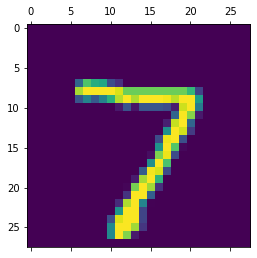

In [117]:
plt.matshow(X_test[0])

In [121]:
y_predicted = model.predict(X_test_flatten)
y_predicted[0]

array([4.3596923e-03, 1.5474983e-08, 2.6461005e-02, 9.7629952e-01,
       1.2741983e-03, 2.0152214e-01, 6.8904569e-08, 9.9988425e-01,
       1.1777258e-01, 7.5755852e-01], dtype=float32)

In [122]:
np.argmax(y_predicted[0])

7

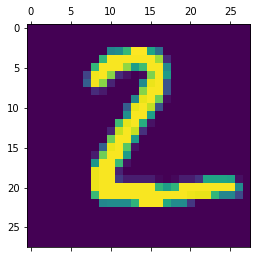

In [124]:
plt.matshow(X_test[1])

In [123]:
np.argmax(y_predicted[1])

2

Confusion metrix

In [126]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [130]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm 

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    2,    2,    0,    6,   10,    2,    1,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   3,    8,  930,   17,    8,    4,   14,    9,   36,    3],
       [   3,    0,   15,  924,    1,   22,    4,    9,   25,    7],
       [   1,    1,    3,    2,  909,    0,   14,    4,   10,   38],
       [   8,    2,    2,   35,    9,  779,   17,    7,   28,    5],
       [   7,    3,    4,    1,    7,   10,  923,    1,    2,    0],
       [   1,    6,   24,    5,    6,    1,    0,  947,    3,   35],
       [   6,    7,    6,   16,    8,   23,   12,   10,  876,   10],
       [  10,    6,    1,    8,   24,    6,    0,   20,    9,  925]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

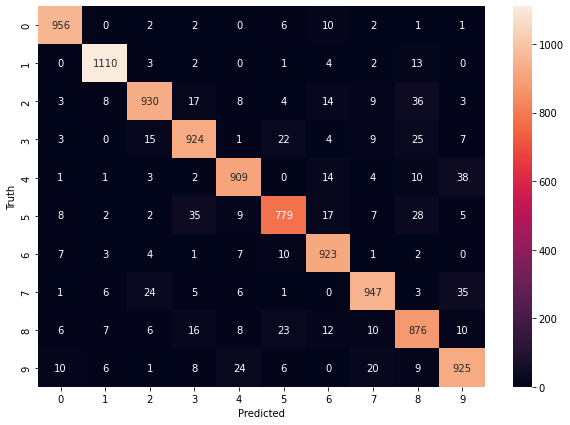

In [134]:
import seaborn as sn 
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [136]:
#Lets add a hidden layer with the model 
model = keras.Sequential([
                          keras.layers.Dense(100, input_shape=(784,),activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']


)
model.fit(X_train_flatten, y_train, epochs= 20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2732 - accuracy: 0.9233
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1236 - accuracy: 0.9633
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0851 - accuracy: 0.9739
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0653 - accuracy: 0.9803
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0509 - accuracy: 0.9845
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0403 - accuracy: 0.9878
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0336 - accuracy: 0.9895
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0270 - accuracy: 0.9918
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0229 - accuracy: 0.9929
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [137]:
#Evaluating the model 
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0960 - accuracy: 0.9802


[0.09595745801925659, 0.9801999926567078]

In [138]:
#Lets create a confusion matrix 
y_predicted = model.predict(X_test_flatten)

In [139]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [140]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm 

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    0,    2,    1,    0,    2,    0,    1,    1],
       [   0, 1126,    3,    1,    0,    0,    1,    1,    3,    0],
       [   0,    0, 1011,    6,    1,    1,    2,    5,    5,    1],
       [   0,    0,    1,  995,    0,    3,    0,    5,    5,    1],
       [   1,    0,    2,    0,  975,    0,    3,    0,    0,    1],
       [   3,    0,    0,   19,    2,  863,    2,    1,    2,    0],
       [   3,    1,    4,    1,    5,    6,  936,    1,    1,    0],
       [   0,    3,    6,    1,    2,    1,    0, 1010,    2,    3],
       [   3,    0,    3,    6,    6,    5,    2,    2,  945,    2],
       [   4,    3,    0,    7,   21,    3,    0,    5,    3,  963]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

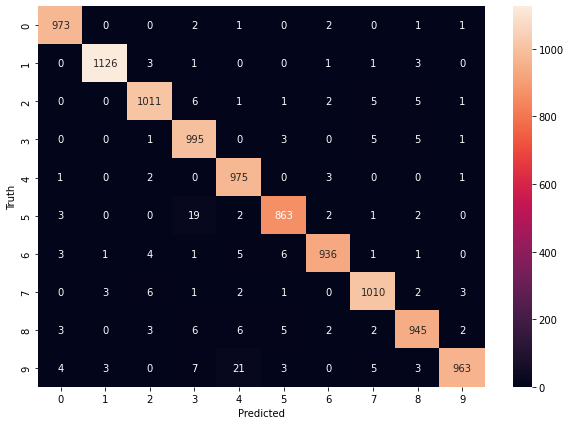

In [141]:
import seaborn as sn 
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3> Same code without the manual flattening </h3>

In [144]:
#We have declared the input_shape in the flatten function 
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(200, activation='relu'),
                          keras.layers.Dense(400, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']


)
model.fit(X_train, y_train, epochs= 20)

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2020 - accuracy: 0.9391
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0854 - accuracy: 0.9740
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0602 - accuracy: 0.9809
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0457 - accuracy: 0.9851
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0358 - accuracy: 0.9881
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0307 - accuracy: 0.9902
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0253 - accuracy: 0.9916
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0217 - accuracy: 0.9929
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0203 - accuracy: 0.9935
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.018